In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

### Протокол с $\frac{\lambda}{4}$

Рассмотрим различные протоколы. Начнём с протокола с $\frac{\lambda}{4}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 3

100%|██████████| 500/500 [04:25<00:00,  1.88it/s]


Mean fidelity: [0.03240628 0.09693803 0.81856299 0.87763787 0.99999998] 	Std fidelity: [3.67401836e-02 9.01083720e-02 1.08840637e-01 8.92132695e-02
 2.81964158e-08]
Mean svx for protocol: [ 1.00000000e+00  8.53141861e-01  1.15586803e-01  7.81371683e-02
 -4.60735948e-09] 	Std s_cvx for protocol: [0.00000000e+00 9.40815204e-02 6.70521209e-02 5.30991554e-02
 8.45223344e-08]


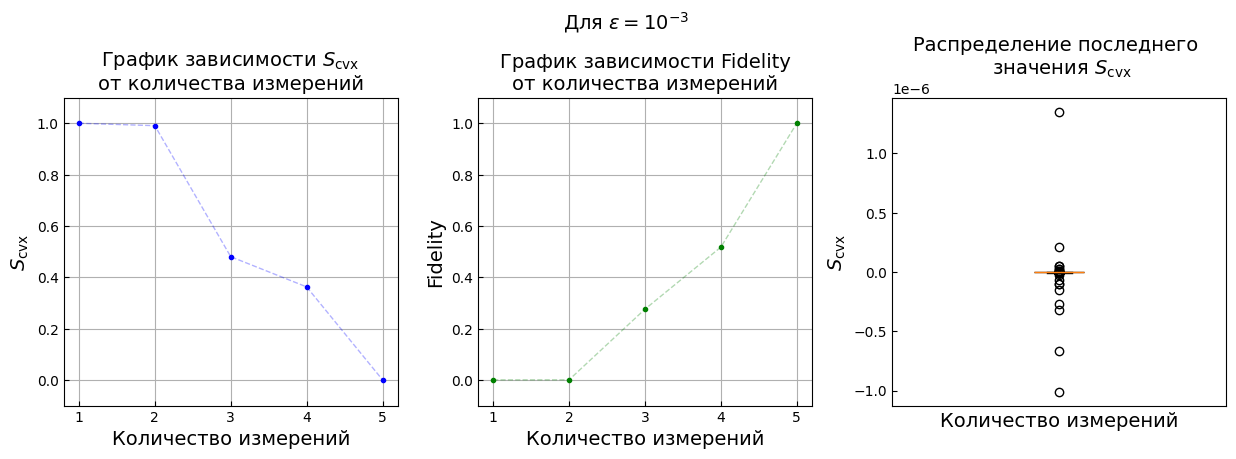

In [2]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [04:24<00:00,  1.89it/s]

Mean fidelity: [0.03110319 0.09249285 0.82520402 0.87673056 0.99999998] 	Std fidelity: [3.39562706e-02 8.50015351e-02 1.06460834e-01 9.06477140e-02
 4.51369849e-09]
Mean svx for protocol: [ 1.00000000e+00  8.54347823e-01  1.14130485e-01  7.53357901e-02
 -2.64841071e-09] 	Std s_cvx for protocol: [0.00000000e+00 9.13103416e-02 6.66746593e-02 5.14869947e-02
 9.65005360e-09]


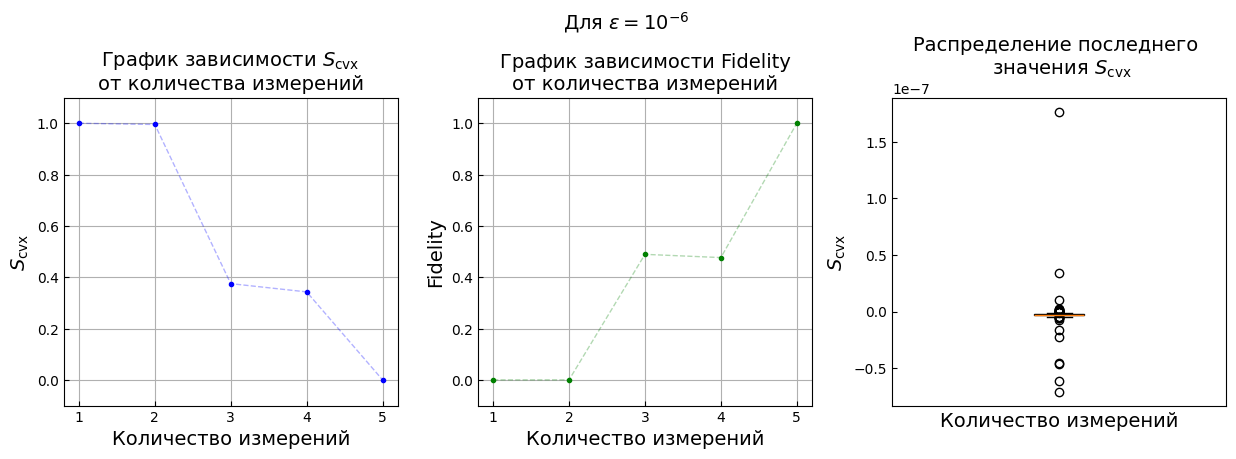

In [3]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

Рассмотрим протокола с $\frac{\lambda}{4}$ без измерения $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

100%|██████████| 500/500 [03:12<00:00,  2.60it/s]

Mean fidelity: [0.09980412 0.29315079 0.97917206 0.99946927] 	Std fidelity: [0.12909513 0.22825633 0.07844352 0.0009905 ]
Mean svx for protocol: [1.00000000e+00 7.80667501e-01 1.31932938e-02 7.19352494e-04] 	Std s_cvx for protocol: [0.         0.16033261 0.041942   0.00080633]


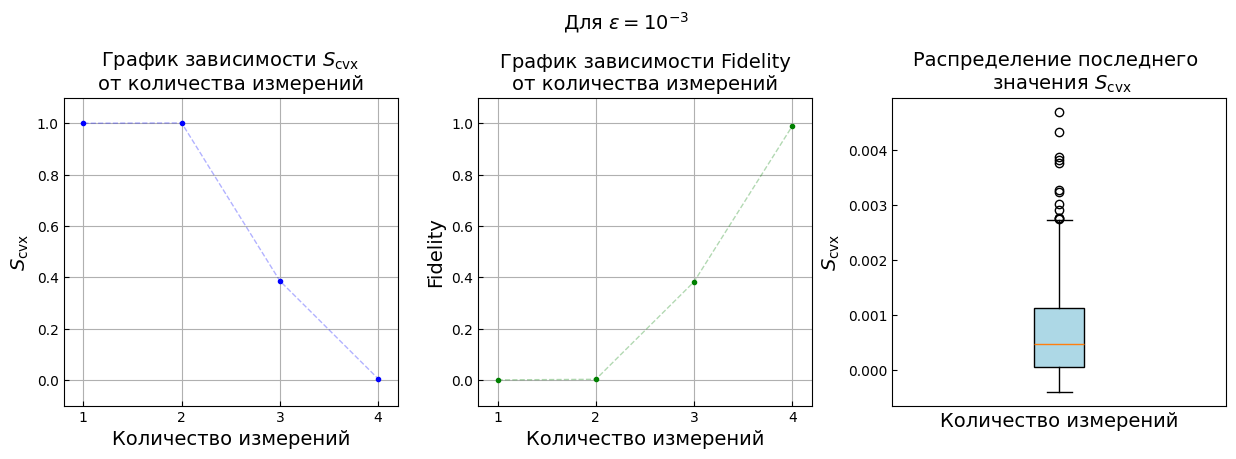

In [4]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8), Gl_4(0)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [03:22<00:00,  2.47it/s]

Mean fidelity: [0.11221344 0.2780642  0.97490911 0.99999984] 	Std fidelity: [1.42972630e-01 2.11234214e-01 8.35682833e-02 6.24268779e-07]
Mean svx for protocol: [1.00000000e+00 7.91838558e-01 1.65110098e-02 4.11470750e-07] 	Std s_cvx for protocol: [0.00000000e+00 1.38319385e-01 5.58989815e-02 6.49209106e-07]


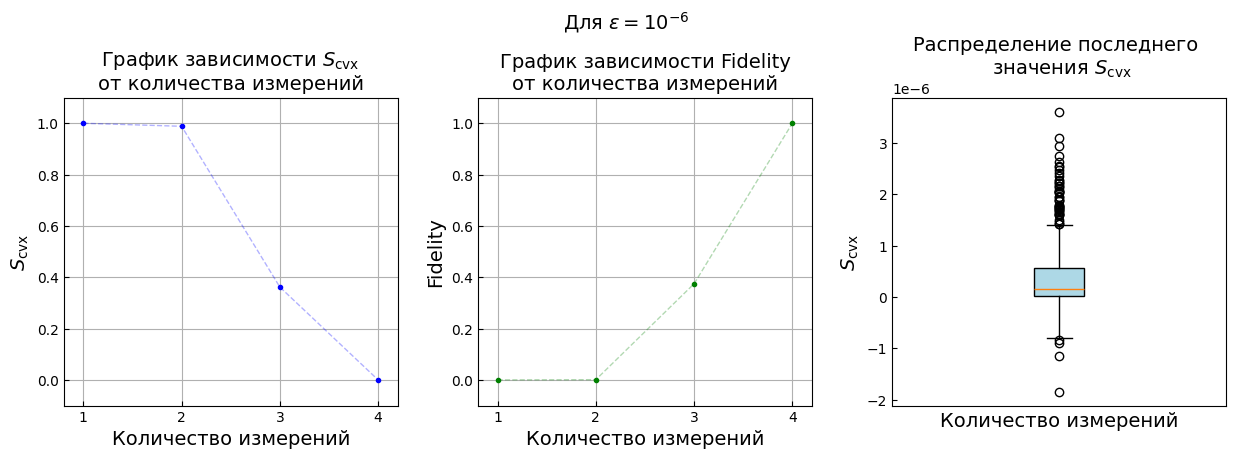

In [5]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8), Gl_4(0)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

Рассмотрим различные протоколы. Рассмотрим протокола с $\frac{\lambda}{4}$ без измерения $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 3

100%|██████████| 500/500 [03:04<00:00,  2.70it/s]

Mean fidelity: [0.02995998 0.09149302 0.14078662 0.87401176] 	Std fidelity: [0.03713533 0.0917523  0.11309038 0.09590575]
Mean svx for protocol: [1.         0.85451304 0.79226305 0.08157242] 	Std s_cvx for protocol: [0.         0.08734634 0.0895813  0.05414616]


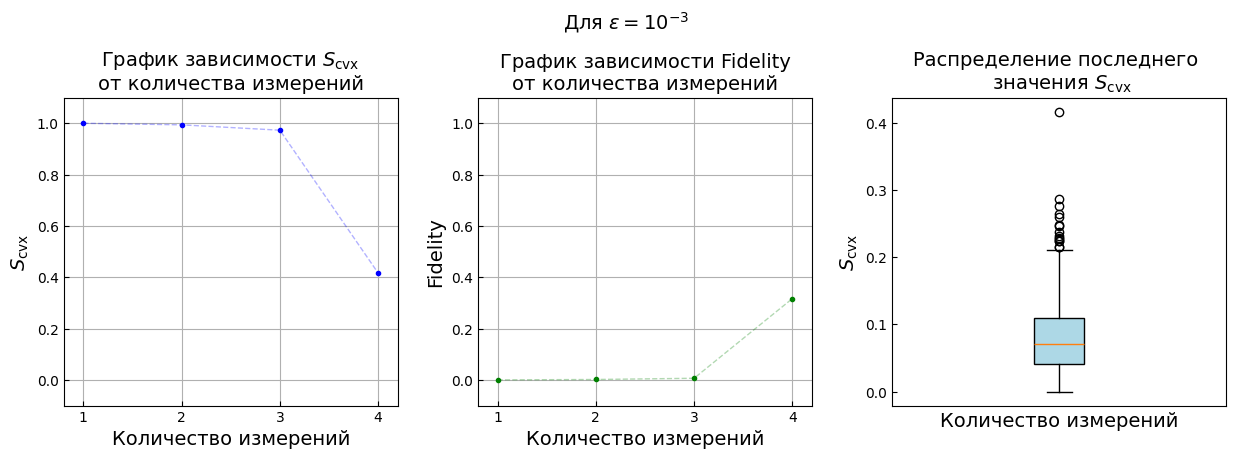

In [6]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})

protocol = [Gl_4(0), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])]
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [03:05<00:00,  2.70it/s]

Mean fidelity: [0.03201466 0.09688319 0.14880108 0.87576327] 	Std fidelity: [0.03700763 0.09351251 0.11073408 0.0939758 ]
Mean svx for protocol: [1.         0.8586399  0.79036501 0.07864359] 	Std s_cvx for protocol: [0.         0.086409   0.09247786 0.05542613]


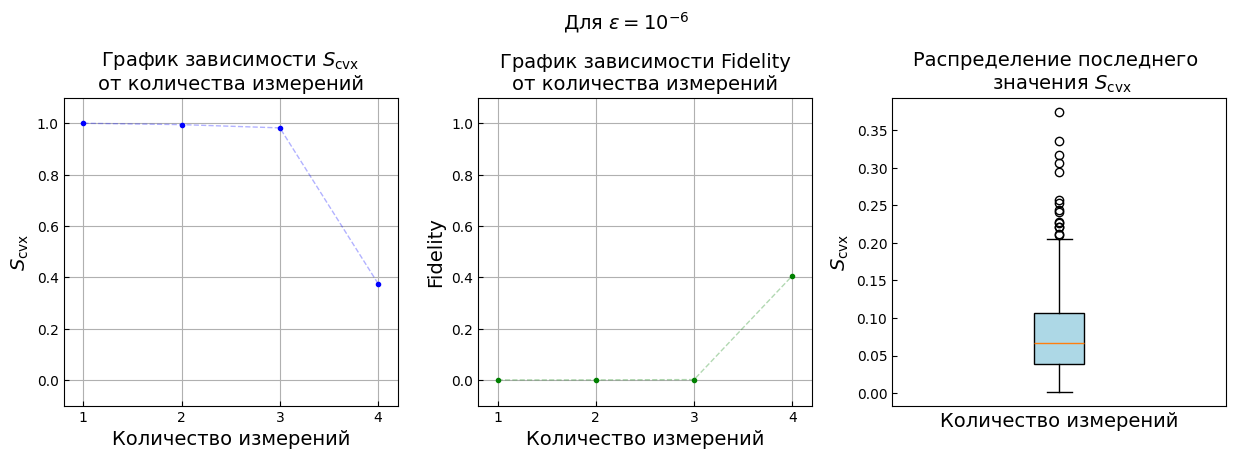

In [7]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

### Протокол с Фёдорова

Теперь рассмотрим протокола с $\frac{\lambda}{4}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

100%|██████████| 500/500 [02:04<00:00,  4.02it/s]

Mean fidelity: [0.15394183 0.6689918  0.99032558] 	Std fidelity: [0.18139956 0.24075506 0.04599037]
Mean svx for protocol: [1.         0.225939   0.00726348] 	Std s_cvx for protocol: [0.         0.15629034 0.02877879]


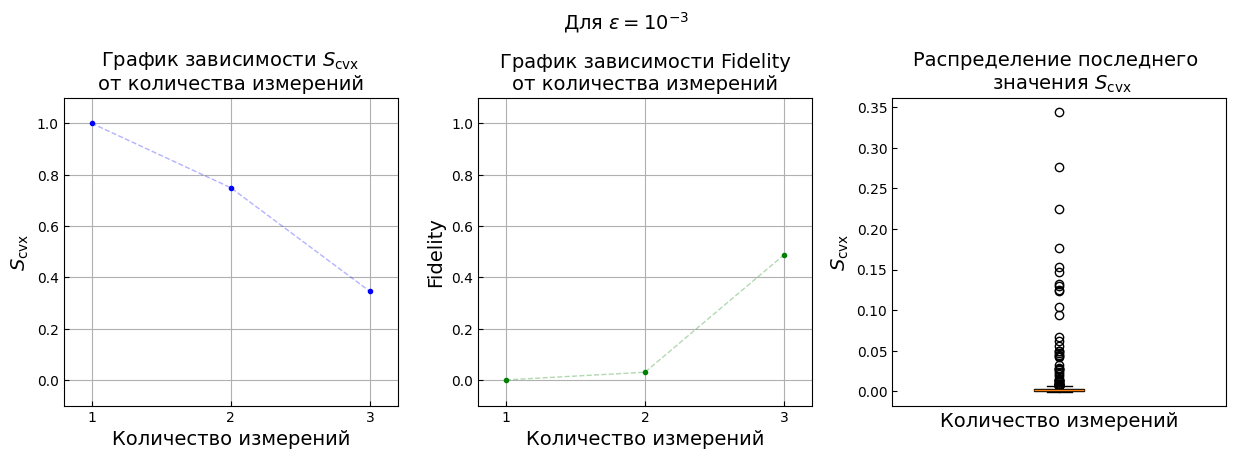

In [8]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [11:37<00:00,  1.40s/it]  

Mean fidelity: [0.15890621 0.68540531 0.99903546] 	Std fidelity: [0.18380364 0.22856275 0.00983403]
Mean svx for protocol: [1.00000000e+00 2.02320659e-01 3.95568125e-04] 	Std s_cvx for protocol: [0.         0.14622888 0.00382427]


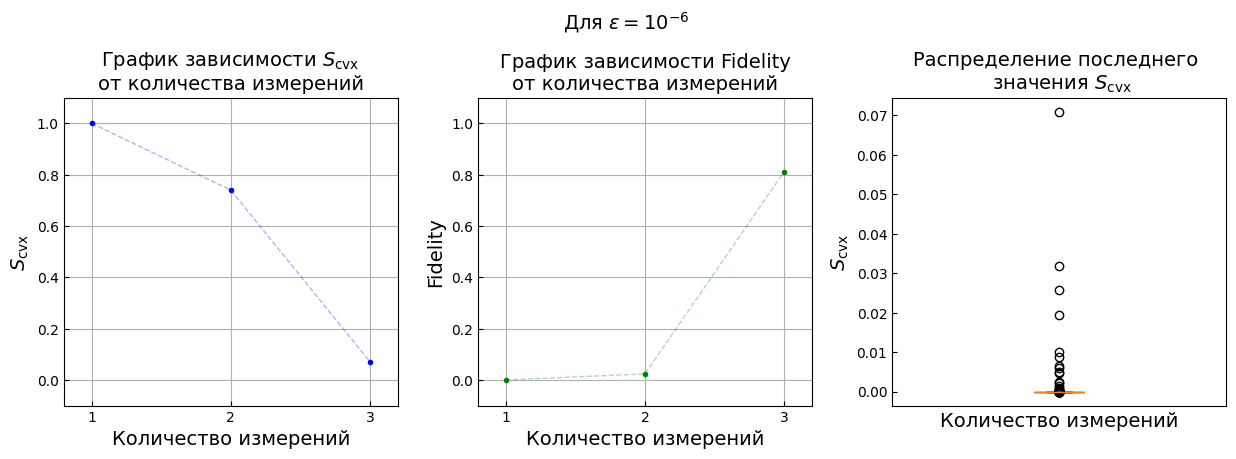

In [9]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

Теперь рассмотрим протокол Фёдорова + измерение $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

100%|██████████| 500/500 [03:07<00:00,  2.67it/s]

Mean fidelity: [0.13968394 0.6592468  0.98964452 0.99976923] 	Std fidelity: [0.17325353 0.25256603 0.04221723 0.00073094]
Mean svx for protocol: [1.00000000e+00 2.22192696e-01 7.61770244e-03 2.28374925e-04] 	Std s_cvx for protocol: [0.         0.16605001 0.02484446 0.00056582]


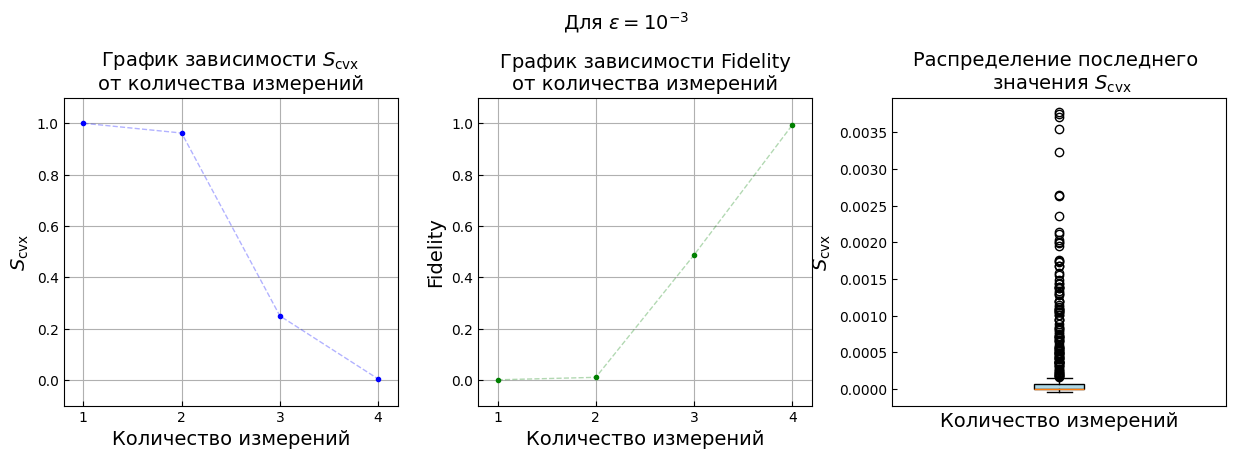

In [10]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1)), Gl_4(pi / 8),]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)

  0%|          | 0/500 [00:00<?, ?it/s]

 19%|█▉        | 97/500 [02:38<03:41,  1.82it/s]  /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 500/500 [31:16<00:00,  3.75s/it]  

Mean fidelity: [0.15118876 0.69101296 1.01359012 1.00000013] 	Std fidelity: [1.87926802e-01 2.37793946e-01 2.97801229e-01 8.44808175e-07]
Mean svx for protocol: [ 1.00000000e+00  2.10050295e-01 -1.93619662e-02  1.10756574e-07] 	Std s_cvx for protocol: [0.00000000e+00 1.56612474e-01 4.25635366e-01 4.03181257e-07]


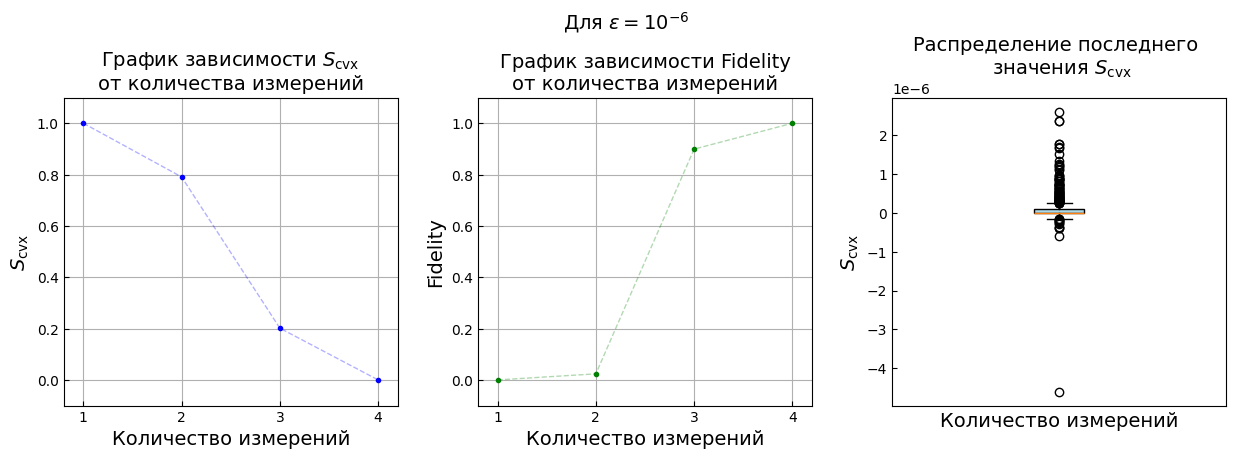

In [11]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1)), Gl_4(pi / 8),]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1], title)